### Dự báo giá đóng cửa của cổ phiếu (Close) của GOOGL sử dụng mô hình Linear Regression

In [3]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [4]:
#Đọc file dữ liệu chứng khoán và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv('/TH_DataMining/Dataset/GOOGL_stock_data.csv')
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [5]:
# Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [6]:
# Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

In [7]:
# Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[143.2935379  143.36958651 143.44563512 143.52168373 143.59773235
 143.67378096 143.74982957 143.82587818 143.90192679 143.9779754
 144.05402401 144.13007262 144.20612123 144.28216984 144.35821845
 144.43426706 144.51031567 144.58636428 144.66241289 144.7384615
 144.81451011 144.89055872 144.96660733 145.04265595 145.11870456
 145.19475317 145.27080178 145.34685039 145.422899   145.49894761]


In [8]:
# Đánh giá độ chính xác validate, test
# Tính MAPE
val_mape = np.mean(np.abs((val_data['Close'] - y_pred_val) / val_data['Close'])) * 100
test_mape = np.mean(np.abs((test_data['Close'] - y_pred) / test_data['Close'])) * 100
print('Validation MAPE:', val_mape)
print('Testing MAPE:', test_mape)

# Tính MAE (Mean Absolute Error)
val_mae = np.mean(np.abs(y_pred_val - val_data['Close']))
test_mae = np.mean(np.abs(y_pred - test_data['Close']))
print('Validation MAE:', val_mae)
print('Testing MAE:', test_mae)

# Tính MSE (Mean Squared Error)
val_mse = np.mean((y_pred_val - val_data['Close'])**2)
test_mse = np.mean((y_pred - test_data['Close'])**2)
print('Validation MSE:', val_mse)
print('Testing MSE:', test_mse)

# Tính MDA (Mean Directional Accuracy)
val_directional_accuracy = np.mean(np.sign(y_pred_val) == np.sign(val_data['Close']))
test_directional_accuracy = np.mean(np.sign(y_pred) == np.sign(test_data['Close']))
print('Validation MDA:', val_directional_accuracy)
print('Testing MDA:', test_directional_accuracy)

Validation MAPE: 36.099211909787925
Testing MAPE: 17.446197440136643
Validation MAE: 35.578767252428555
Testing MAE: 20.77475286836691
Validation MSE: 1347.0223679455607
Testing MSE: 544.8057047028321
Validation MDA: 1.0
Testing MDA: 1.0


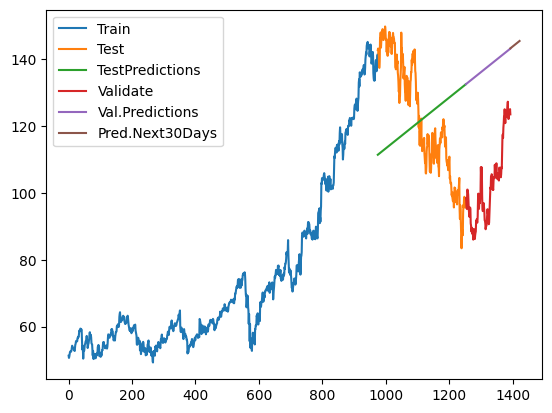

In [9]:
# Vẽ biểu đồ
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, val_data['Close'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'TestPredictions','Validate', 'Val.Predictions', 'Pred.Next30Days'])
plt.show()